## Least-Square Linear Regression

You have heard about (linear) classification methods and least-square linear regression in the lecture. 

__Task:__ Describe the difference between regression and classification in one sentence. 

In the next part, we want to implement a least-square linear regression. This means that given a set of points $\{\mathbf{x_i},y_i\}$, $i = 1..N$, we want to find that line (or hyperplane in higher dimensions) which minimizes the least-square error. The least-square error measures the quadratic distance from the predicted points by the linear model to the actual values.

The general formula of the least square regression is $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ where $\epsilon$ is a vector with dimensionality $\mathbb{R}^N$ containing the normally-distributed noise terms $N(0,\sigma^2)$, $\mathbf{y}$ is the vector of labels and $\mathbf{X}$ is the matrix of data points with dimensionality $\mathbb{R}^{NxD}$. We are interested in estimating the coefficients $\hat{\boldsymbol w}$ of the true coefficients $\boldsymbol w$. You saw in the lecture that the estimates are given by:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

where $\mathbf{X}$ is the matrix of regressor data (the first column is all 1’s for the intercept), and $\mathbf{y}$ is the vector of the dependent variable data. 

__Tasks:__ 
1.  Look at how the following data is generated. What are the real parameters of w?
2.  We want to implement a least-square linear regression now. Follow the following steps:
    1. ) Bring the data in the correct shape as requested by the formula above.    
    2. ) Calculate the estimates of the coefficients w.
    3. ) Add the resulting line to the given scatter plot of the data.
    4. ) Compute the mean square-error of the residuals, i.e. $ \sum_{i=1}^N \|y(x_i) - y_i \|$.
    5. ) Compare your results to the numpy built-in function np.linalg.lstsq(...)
3. Plot the residuals (e.g. using seaborn function residplot (you will need to install statsmodel with '_sudo pip3 install statsmodels_' ) and check the conditions of the linear regression.

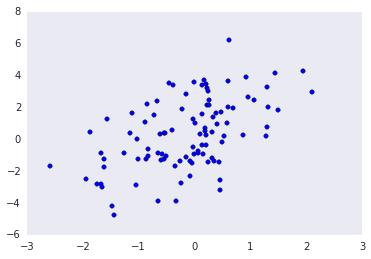

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate data
N_samples = 100
white_noise_stddev = 2
X = np.random.randn(N_samples,1)
eps = np.random.randn(N_samples,1)*white_noise_stddev
w = [1.3]
y = 0.5+w*X+eps

## Make Plot of the data
plt.scatter(X, y);
plt.grid()

shape X new (100, 2)
shape y (100, 1)
X_enh.T dot X_enh 
 [[ 100.          -14.49490444]
 [ -14.49490444   81.24841199]]
inverse of X_enh.T dot X_enh  
 [[ 0.01026546  0.00183138]
 [ 0.00183138  0.01263466]]
w  
 [[ 0.50811488]
 [ 1.29185579]]
res_err 345.118198019
beta_builtin  [[ 0.50811488]
 [ 1.29185579]]
residual [ 345.11819802]
rank 2


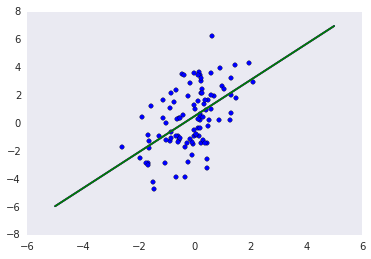

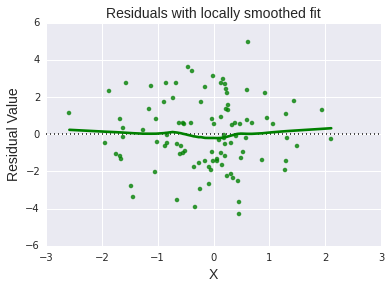

In [14]:
## 2. A) Bring the data in the correct shape
X_enh = np.zeros((len(X),2))   # kürzer: np.ones, dann kann man sich nächste Zeile sparen
X_enh[:,0] = 1.
X_enh[:,1] = X[:,0]

# X_enh = np.column_stack((np.ones(len(X)),X))

#w = np.zeros((2,1))

print("shape X new", X_enh.shape)
print("shape y", y.shape)
#print("shape w", w.shape)


## B) Use the equation from above (X'X)^(-1)X'Y to calculate the estimate of the least-square coefficient:
# Hints:np.dot() computes the matrix-matrix product
#       np.linalg.inv() computes the matrix inverse
#       X.T is the transpose of X

w = np.dot(np.linalg.inv(np.dot(X_enh.T,X_enh)),np.dot(X_enh.T,y))

print("X_enh.T dot X_enh \n", np.dot(X_enh.T,X_enh))
print("inverse of X_enh.T dot X_enh  \n", np.linalg.inv(np.dot(X_enh.T,X_enh)))

print("w  \n", w)

## C) Plot the resulting line

# line = w0 + x*w1 = w[0] + x * w[1]   (augmented notation, w[0] = bias)

x_min = X_enh[:,1].min()
x_max = X_enh[:,1].max()

x_min = -5
x_max = +5


# following several alternative fomulations...

y_min = np.dot([1,x_min], w)  # 
y_max = np.dot([1,x_max], w)

plt.plot([x_min,x_max],[y_min,y_max],c='red');


x_min = [1,-5]   # defining the plot sectiona along the x_axis, using "augmented notation"
x_max = [1, 5]

y_min = np.dot(x_min, w)  # y = xw
y_max = np.dot(x_max, w)

plt.plot([x_min[1],x_max[1]],[y_min,y_max],c='blue');




# Matrix [[1, -5], [1, 5]] bildet Basisvektoren [1,0] (weight = 1, slope = 0) und [0,1) gerade richtig ab: 
# [1,1], bzw.[-5,5]
# plt.plot([x_min,x_max],np.dot([[1, x_min], [1, x_max]],w),c='green');


# plt.plot([x_min,x_max],[w[0]+w[1]*x_min,w[0]+w[1]*x_max])
# plt.plot([x_min,w[0]+w[1]*x_min],[x_max,w[0]+w[1]*x_max])

plt.plot([-5,5],np.dot([[1, -5], [1, 5]],w),c='green');   # from solution

#plt.plot([x_min,x_max],[y_min,y_max],c='red');

plt.scatter(X_enh[:,1], y);
plt.grid()

## D) Compute the mean square-error (residual)

# error = sum ((y(x) - y_pred)^2) 

res_error=np.sum((np.dot(X_enh,w)-y)*(np.dot(X_enh,w)-y))

print("res_err", res_error)

## E) Compare to built-in function
# Solves the equation a x = b by computing a vector x that minimizes the Euclidean 2-norm || b - a x ||^2. 

beta_builtin,residual,rank,_ = np.linalg.lstsq(X_enh, y)

print("beta_builtin ", beta_builtin)  # estimated weights
print("residual", residual)       # estimated sum of squared errors
print("rank", rank)


## 3) Plot the residuals
# test if linear regression is appropriate: see https://seaborn.pydata.org/tutorial/regression.html
# dots should be scattered around y=o randomly, without a structure, 
# If there is structure in the residuals, it suggests that simple linear regression is not appropriate:
import seaborn as sns
plt.figure()
#This function will regress y on x (possibly as a robust or polynomial regression) and then draw a scatterplot of the residuals.
sns.residplot(np.squeeze(X), np.squeeze(y), lowess=True,  color="g")
plt.xlabel('X',fontsize = 14)
plt.ylabel('Residual Value', fontsize = 14)
plt.title('Residuals with locally smoothed fit', fontsize = 14)
sns.plt.show()



## Mathematical concepts of linear regression

We want to look more closely at the mathematical backgrounds of the least-square linear regression. One step before obtaining the final solution $\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$, one has the so-called normal equations: \begin{equation}
(\mathbf{X}^{\rm T}\mathbf{X}) \hat{\boldsymbol w} = \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

### Q3.1.1 Which condition on X has to be satisifed such that $(\mathbf{X}^{\rm T}\mathbf{X})$ can be inverted?

### Q3.1.2 Name scenarios in which this condition is violated.


In case, $(\mathbf{X}^{\rm T}\mathbf{X})$ is not invertible, one applies a so-called Moore-Penrose pseudoinverse. This is a generalization of the common matrix inversion to singular or non-quadratic matrices.

__Task__: Read about the pseudoinverse and list three properties of the pseudoinverse.

## The role of outliers in least-square linear regression 

Sometimes the data is not as clean as in the above case. In the following data set, we added one additional point [45,12] to the previous data set. We want to investigate how this point influences the estimates of $\mathbf w$ and find a strategy to avoid any occurring problems.

__Tasks:__
1. Apply a least square linear estimator to the new data set and visualize the results
2. Compare the estimator for w with the one from before.
3. Plot the residuals, i.e. the difference between the predicted variable $y(x_i)$ and real variable $y_i$.
4. In the lecture you have heard several conditions on the residual which should be satisfied for the linear regression. Check them in this case! 

__Hint__: You should re-run the simulation a few times to answer question number 4).

w_est [ 0.84515281  0.29283569]


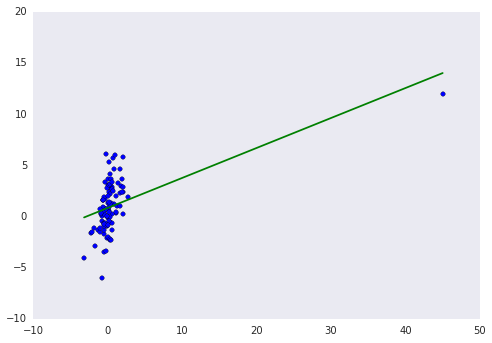

y  (101,)
y squeeze (101,)


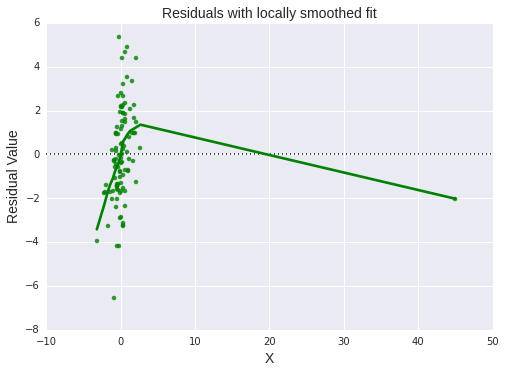

In [3]:
## Data Generation as before plus one outlier [45,12]
n = 100
white_noise_sd = 2
X = np.random.randn(n,1)
eps = np.random.randn(n,1)*white_noise_sd
w = [1.3]
y = 0.5+w*X+eps
X = np.append(X,45)
y = np.append(y,12)

# 1) Apply a least square linear estimator to the new data set

X_enh = np.column_stack((np.ones(len(X)),X))

w_est,residual,rank,_ = np.linalg.lstsq(X_enh, y)

# 2) Compare estimator for w and visualize the results
print ("w_est", w_est)

x_min = X_enh[:,1].min()
x_max = X_enh[:,1].max()
plt.plot([x_min,x_max],np.dot([[1, x_min], [1, x_max]],w_est),c='green');

plt.scatter(X, y);
plt.grid()
plt.show()

# 3) Plot the residuals
print("y ", y.shape)
print("y squeeze", np.squeeze(y).shape)
sns.residplot(X, y, lowess=True,  color="g")
plt.xlabel('X',fontsize = 14)
plt.ylabel('Residual Value', fontsize = 14)
plt.title('Residuals with locally smoothed fit', fontsize = 14)
sns.plt.show()

# You can use the seaborn plot residplot (statsmodels package is necessary. Get it via: ""sudo pip3 install statsmodels"")

### Q3.1.3 What do you conclude from this example regarding the estimated weight vector and residuals? 

### Q3.1.4 Think of possible strategies to avoid this problem.